Первоначальная версия датасета содержит 17 полей со следующей информацией:

- hotel_address — адрес отеля;
- review_date — дата, когда рецензент разместил соответствующий отзыв;
- average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
- hotel_name — название отеля;
- reviewer_nationality — страна рецензента;
- negative_review — отрицательный отзыв, который рецензент дал отелю;
- review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
- positive_review — положительный отзыв, который рецензент дал отелю;
- review_total_positive_word_counts — общее количество слов в положительном отзыве.
- reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
- total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
- total_number_of_reviews — общее количество действительных отзывов об отеле;
- tags — теги, которые рецензент дал отелю;
- days_since_review — количество дней между датой проверки и датой очистки;
- additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
- lat — географическая широта отеля;
- lng — географическая долгота отеля.

# 1. Удаляем строковые данные 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
hotels = pd.read_csv('data/hotels.csv')
# hotels.head(10)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060
5,Via Mecenate 121 20138 Milan Italy,105,12/30/2015,8.0,Novotel Milano Linate Aeroporto,France,Nothing,2,1607,Very nice hotel Price is excellent when compa...,16,1,10.0,"[' Business trip ', ' Solo traveler ', ' Super...",582 day,45.448188,9.257046
6,97 Cromwell Road Kensington and Chelsea London...,854,5/18/2017,7.8,Holiday Inn London Kensington Forum,United Kingdom,Nothing it was lovely,6,3867,Very central location 2 minutes walk from Glo...,29,4,9.6,"[' Leisure trip ', ' Couple ', ' Double Room N...",77 days,51.494231,-0.185114
7,Josefsgasse 4 6 08 Josefstadt 1080 Vienna Austria,227,1/23/2017,8.3,Mercure Josefshof Wien,United Kingdom,The communal areas are a bit soul less and th...,40,2526,The location is good for transport links espe...,107,39,8.3,"[' Leisure trip ', ' Couple ', ' Superior Doub...",192 day,48.208563,16.354169
8,190 Queen s Gate Kensington and Chelsea London...,227,11/24/2015,8.6,The Gore Hotel Starhotels Collezione,United Kingdom,undergoing refurbishment no tea coffer in roo...,30,968,staff very good location wonderful,7,3,8.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",618 day,51.500198,-0.179536
9,Holland Park Avenue Kensington and Chelsea Lon...,843,2/2/2016,7.8,Hilton London Kensington Hotel,United Kingdom,I advised it was for my husbands birthday and...,47,3801,No Positive,0,1,6.7,"[' Leisure trip ', ' Couple ', ' Twin Hilton G...",548 day,51.505108,-0.213266


In [9]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [10]:
hotels_df = hotels.copy()

# Создаем из столбца 'hotel_address' столбцы 'country', 'city' и 'post_code'
hotels_df['country'] = hotels_df['hotel_address'].apply(lambda x: 'United Kingdom' if x.split(' ')[-1] == 'Kingdom' else x.split(' ')[-1])
# hotels_df['city'] = hotels_df['hotel_address'].apply(lambda x: x.split(' ')[-5] if x.split(' ')[-1] == 'Kingdom' else x.split(' ')[-2])
hotels_df['post_code'] = hotels_df['hotel_address'].apply(lambda x: ' '.join(x.split(' ')[-4:-2]) if x.split(' ')[-1] == 'Kingdom' or x.split(' ')[-1] == 'Netherlands'  else x.split(' ')[-3])

# Удаляем столбец hotel_address

hotels_df.drop('hotel_address', axis=1, inplace=True)

In [11]:
# Переводим столбец 'review_date' в формат datetime и выражаем значения в кварталах
hotels_df["review_date"] = pd.to_datetime(hotels["review_date"], dayfirst=False)
hotels_df["review_date"] = hotels_df["review_date"].dt.quarter

In [12]:
# Переводим столбец 'negative_review' из строкового значения в числовой
no_negative_list = ['No Negative', 'Nothing', 'Nothing ', 'nothing', 'N A', 'None', ' ', 'N a']
hotels_df["negative_review"] = hotels_df["negative_review"].apply(lambda x: 0 if x in no_negative_list else 1)

In [13]:
# Переводим столбец 'positive_review' из строкового значения в числовой
no_positive_list = ['No Positive', 'Nothing', 'Nothing ', 'nothing', 'N A', 'None', ' ', 'N a']
hotels_df["positive_review"] = hotels_df["positive_review"].apply(lambda x: 0 if x in no_positive_list else 1)

In [14]:
# Убираем лишние пробелы в названиях в столбце reviewer_nationality
hotels_df['reviewer_nationality'] = hotels_df['reviewer_nationality'].apply(lambda x: ' '.join(x.split(' ')[1:-1]) if type(x) is str else x)

# Оставляем в столбце названия с наиболее популярными странами и странами в которых расположены отели 
hotel_country_location = list(set(hotels_df['country']))
reviewer_nationality_popular = set(list(hotels_df['reviewer_nationality'].value_counts().nlargest(10).index) + hotel_country_location)
hotels_df['reviewer_nationality'] = hotels_df['reviewer_nationality'].apply(lambda x: x if x in reviewer_nationality_popular else 'other')

In [15]:
# Переводим значения столбца days_since_review в числовое значение, удаляя лишние строковые значения

hotels_df['days_since_review'] = hotels_df['days_since_review'].apply(lambda x: ' '.join(x.split(' ')[0]) if type(x) is str else x)
hotels_df['days_since_review'] = hotels_df['days_since_review'].apply(lambda x: int(''.join(x.split(' '))) if type(x) is str else x)

In [16]:
# Удаляем лишние знаки в столбце tags и преобразуем в список

def get_tags_in_list(arg):
    for i, j in ('[', ''), (']', ''), ('"', ''), ("' ", ""), (" '", ""):
        arg = arg.replace(i, j)
    arg = arg.split(', ')
    return arg
hotels_df['tags'] = hotels_df['tags'].apply(get_tags_in_list)

In [17]:
# Задание 4.2 Найдем кол-во уникальных названий отелей

unique_hotels_qnt = len(hotels_df['hotel_name'].unique())
print(f'Кол-во уникальных названий отелей составляет {unique_hotels_qnt}')

Кол-во уникальных названий отелей составляет 1492


In [18]:
# Задание 4.3 Определим диапазон размещения отзывов по датам

min_review_date = hotels_df['review_date'].min()
max_review_date = hotels_df['review_date'].max()
print(f'Самый первый отзыв был оставлен {min_review_date}, а самый свежий {max_review_date}')

Самый первый отзыв был оставлен 1, а самый свежий 4


In [19]:
# Задание 4.4 Найдем список уникальных значений в столбце tag

unique_tags = list()
popular_tags_dict = dict()
for item in hotels_df['tags']:
    for j in item:
        if j not in unique_tags:
            unique_tags.append(j)
            popular_tags_dict[j]= 1
        else: popular_tags_dict[j]= +1

print(f'Cписок уникальных значений в столбце tag составляет {len(unique_tags)}')

Cписок уникальных значений в столбце tag составляет 2368


In [20]:
# Задание 4.5 Определим какой тег представлен в наибольшем числе отзывов

print(f'Тег "{max(popular_tags_dict, key=popular_tags_dict.get)}" представлен в наибольшем числе отзывов')

Тег "Leisure trip" представлен в наибольшем числе отзывов


In [21]:
# Задание 4.6 Определим на сколько ночей чаще всего останавливаются путешественники в отелях.

def get_stayed_night(arg):
    for j in arg:
        if j[0:6] == 'Stayed':
            return (int(j.split()[1]))

hotels_df['stayed_night'] = hotels_df['tags'].apply(get_stayed_night)
mode_stayed_night = int(hotels_df['stayed_night'].mode())
print(f'Наиболее популярное количество ночей,на которое останавливались путешественники в отеле составляет {mode_stayed_night} ночь')

Наиболее популярное количество ночей,на которое останавливались путешественники в отеле составляет 1 ночь


# 2. Заполняем пропущенные значания

In [22]:
fill_data = hotels_df.copy()

# Создадим словари со значениями lat, lng, на основании почтового кода post_code
lat_dict = dict()
lng_dict = dict()
for item in hotels_df['post_code']:
    if item not in lat_dict.keys():
        lat_dict[item] = fill_data[fill_data['post_code']==item]['lat'].values[0]
    if item not in lng_dict.keys():
        lng_dict[item] = fill_data[fill_data['post_code']==item]['lng'].values[0]
        
lat_dict.update({'1160': 50.81685})
lng_dict.update({'1160': 4.42447})

In [23]:
values = {
    'stayed_night': fill_data['stayed_night'].mode()[0],
    'lat': fill_data['post_code'],
    'lng': fill_data['post_code']
}

#заполняем пропуски в соответствии с заявленным словарем:
fill_data = fill_data.fillna(values)

# Заменяем строчные значения в столбце lat на значения в словаре lat_dict
def get_lat(arg):
    if type(arg) is str:
        return lat_dict[arg]
    else: 
        return arg
fill_data['lat'] = fill_data['lat'].apply(get_lat)

# Заменяем строчные значения в столбце lng на значения в словаре lng_dict
def get_lng(arg):
    if type(arg) is str:
        return lng_dict[arg]
    else: 
        return arg
        #fill_data['lat'] = lat_dict[lat]
fill_data['lng'] = fill_data['lng'].apply(get_lng)

In [24]:
# Удалим лишние столбцы
fill_data.drop(['hotel_name', 'tags'], axis=1, inplace=True)

In [25]:
# Произведем поиск дубликатов

dupl_columns = list(fill_data.columns)
#dupl_columns.remove('id')
mask = fill_data.duplicated(subset=dupl_columns)
hotels_duplicates = fill_data[mask]
print(f'Число найденных дубликатов: {hotels_duplicates.shape[0]}')

Число найденных дубликатов: 335


In [26]:
hotels_dedupped = fill_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hotels_dedupped.shape[0]}')

Результирующее число записей: 386468


# 3. Создаем новые признаки

In [27]:
hotels_encoder = fill_data.copy()

In [28]:
hotels_encoder_dedupped = hotels_dedupped.copy()

In [29]:
# Закодируем признаки reviewer_nationality и country, city. Используем класс OneHotEncoding
import category_encoders as ce

encoder_reviewer_nationality = ce.OneHotEncoder(cols=['reviewer_nationality'], use_cat_names=True)
encoder_country = ce.OneHotEncoder(cols=['country'], use_cat_names=True) # указываем столбец для кодирования
type_bin_reviewer_nationality = encoder_reviewer_nationality.fit_transform(hotels_encoder['reviewer_nationality'])
type_bin_country = encoder_country.fit_transform(hotels_encoder['country'])
hotels_encoder = pd.concat([hotels_encoder, type_bin_reviewer_nationality], axis=1)
hotels_encoder = pd.concat([hotels_encoder, type_bin_country], axis=1)

# Удалим столбцы reviewer_nationality и country
hotels_encoder.drop(['reviewer_nationality', 'country'], axis=1, inplace=True)

In [30]:
# dedupped
# Закодируем признаки reviewer_nationality и country, city. Используем класс OneHotEncoding
import category_encoders as ce

encoder_reviewer_nationality_dedupped = ce.OneHotEncoder(cols=['reviewer_nationality'], use_cat_names=True)
encoder_country_dedupped = ce.OneHotEncoder(cols=['country'], use_cat_names=True) # указываем столбец для кодирования
type_bin_reviewer_nationality_dedupped = encoder_reviewer_nationality_dedupped.fit_transform(hotels_encoder_dedupped['reviewer_nationality'])
type_bin_country_dedupped = encoder_country_dedupped.fit_transform(hotels_encoder_dedupped['country'])
hotels_encoder_dedupped = pd.concat([hotels_encoder_dedupped, type_bin_reviewer_nationality_dedupped], axis=1)
hotels_encoder_dedupped = pd.concat([hotels_encoder_dedupped, type_bin_country_dedupped], axis=1)

# Удалим столбцы reviewer_nationality и country
hotels_encoder_dedupped.drop(['reviewer_nationality', 'country'], axis=1, inplace=True)

In [31]:
#  Закодируем бинарным способом признак post_code. Используем класс BinaryEncoder
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=['post_code']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_encoder['post_code'])
hotels_encoder = pd.concat([hotels_encoder, type_bin], axis=1)

# Удалим столбец post_code
hotels_encoder.drop('post_code', axis=1, inplace=True)

In [32]:
# dedupped
#  Закодируем бинарным способом признак post_code. Используем класс BinaryEncoder
import category_encoders as ce

bin_encoder_dedupped = ce.BinaryEncoder(cols=['post_code']) # указываем столбец для кодирования
type_bin_dedupped = bin_encoder_dedupped.fit_transform(hotels_encoder_dedupped['post_code'])
hotels_encoder_dedupped = pd.concat([hotels_encoder_dedupped, type_bin_dedupped], axis=1)

# Удалим столбец post_code
hotels_encoder_dedupped.drop('post_code', axis=1, inplace=True)

In [254]:
# Сохраним преобразоанный файл без удаленя дубликатов для соревнований в Kagggle
hotels_encoder.to_csv('data/decoded_data.csv', index=False)

In [36]:
# Сохраним преобразоанный файл с удалением дубликатов
hotels_encoder_dedupped.to_csv('data/decoded_data_dedupped.csv', index=False)

# 4. Произведем преобразование признаков

In [185]:
import pandas as pd

# hotels_test = pd.read_csv('data/decoded_data.csv')
hotels_test_dedupped = pd.read_csv('data/decoded_data_dedupped.csv')

## Тест Д’Агостино на нормальность

In [38]:
from scipy.stats import normaltest

alpha = 0.05
H0 = 'распределены нормально'
Ha = 'не распределены нормально (мы отвергаем H0)'

for col in hotels_test_dedupped.columns:
    _, p = normaltest(hotels_test_dedupped[col])
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

    print('p=%.3f' % p)

# Интерпретация 

    if p > alpha/2:
        print(f'Данные {col} {H0}')
    else:
        print(f'Данные {col} {Ha}')

p=0.000
Данные additional_number_of_scoring не распределены нормально (мы отвергаем H0)
p=0.000
Данные review_date не распределены нормально (мы отвергаем H0)
p=0.000
Данные average_score не распределены нормально (мы отвергаем H0)
p=0.000
Данные negative_review не распределены нормально (мы отвергаем H0)
p=0.000
Данные review_total_negative_word_counts не распределены нормально (мы отвергаем H0)
p=0.000
Данные total_number_of_reviews не распределены нормально (мы отвергаем H0)
p=0.000
Данные positive_review не распределены нормально (мы отвергаем H0)
p=0.000
Данные review_total_positive_word_counts не распределены нормально (мы отвергаем H0)
p=0.000
Данные total_number_of_reviews_reviewer_has_given не распределены нормально (мы отвергаем H0)
p=0.000
Данные reviewer_score не распределены нормально (мы отвергаем H0)
p=0.000
Данные days_since_review не распределены нормально (мы отвергаем H0)
p=0.000
Данные lat не распределены нормально (мы отвергаем H0)
p=0.000
Данные lng не распределен

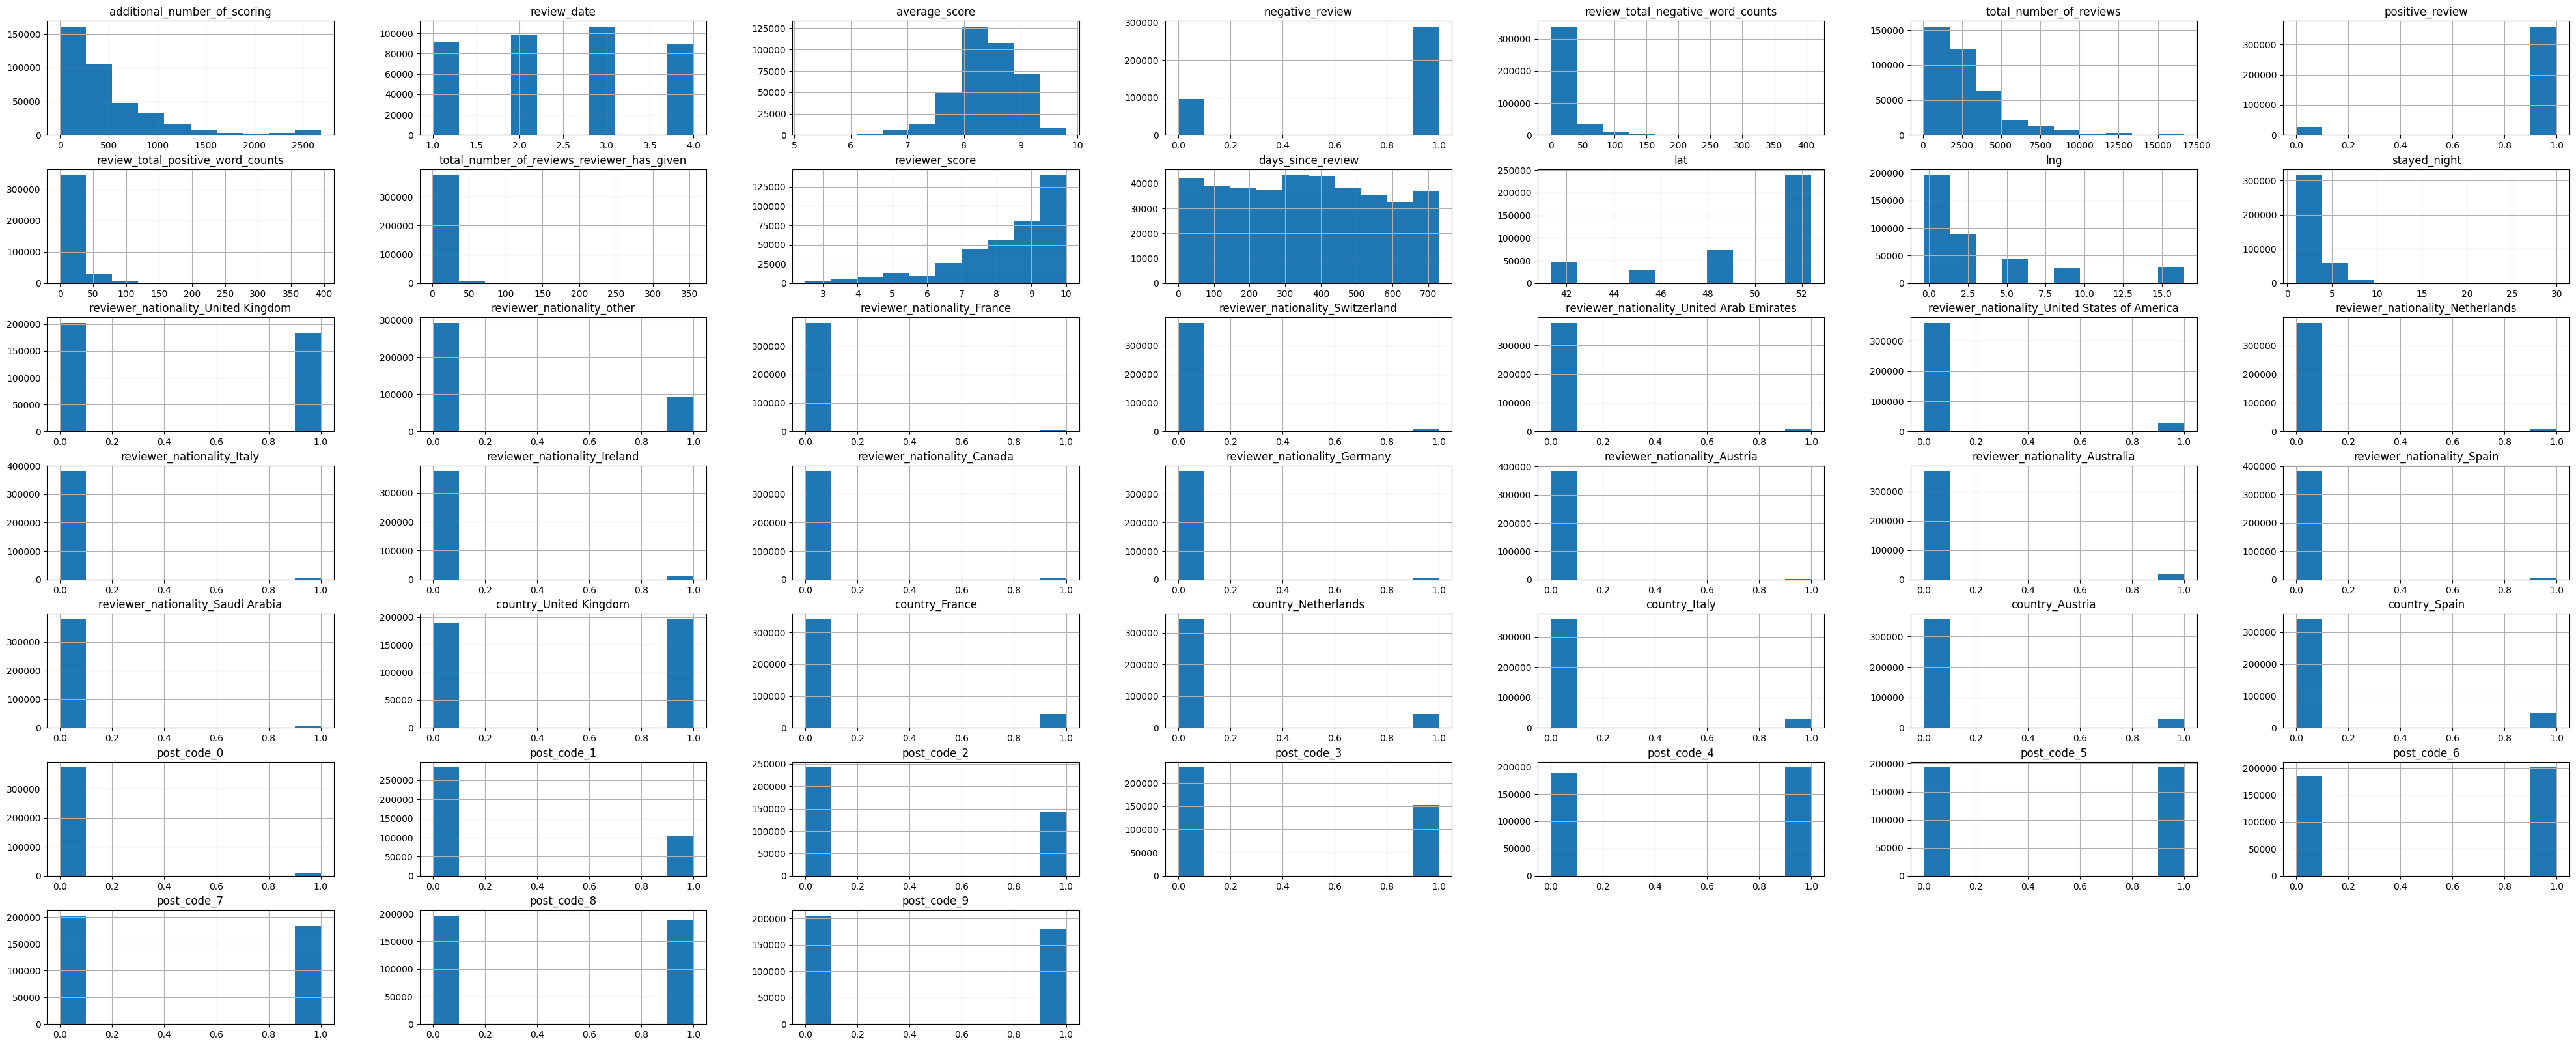

In [186]:
# Построим гистограмму для визуальной оценки признаков на нормальность
hotels_test_dedupped.hist(figsize=(50, 20));

*Вывод: гистограмма и тест Д’Агостино показывают, что данные всех столбцов не распределены нормально*

In [190]:
from sklearn import preprocessing

# Нормализуем признаки с помощью нормализатора RobustScaler
r_scaler = preprocessing.RobustScaler()

hotels_RobustScaler = hotels_test_dedupped.copy()
col_names_norm = hotels_RobustScaler.columns

# кодируем исходный датасет
df_r = r_scaler.fit_transform(hotels_RobustScaler)

# Преобразуем промежуточный датасет в полноценный датафрейм
hotels_RobustScaler = pd.DataFrame(df_r, columns=col_names_norm)

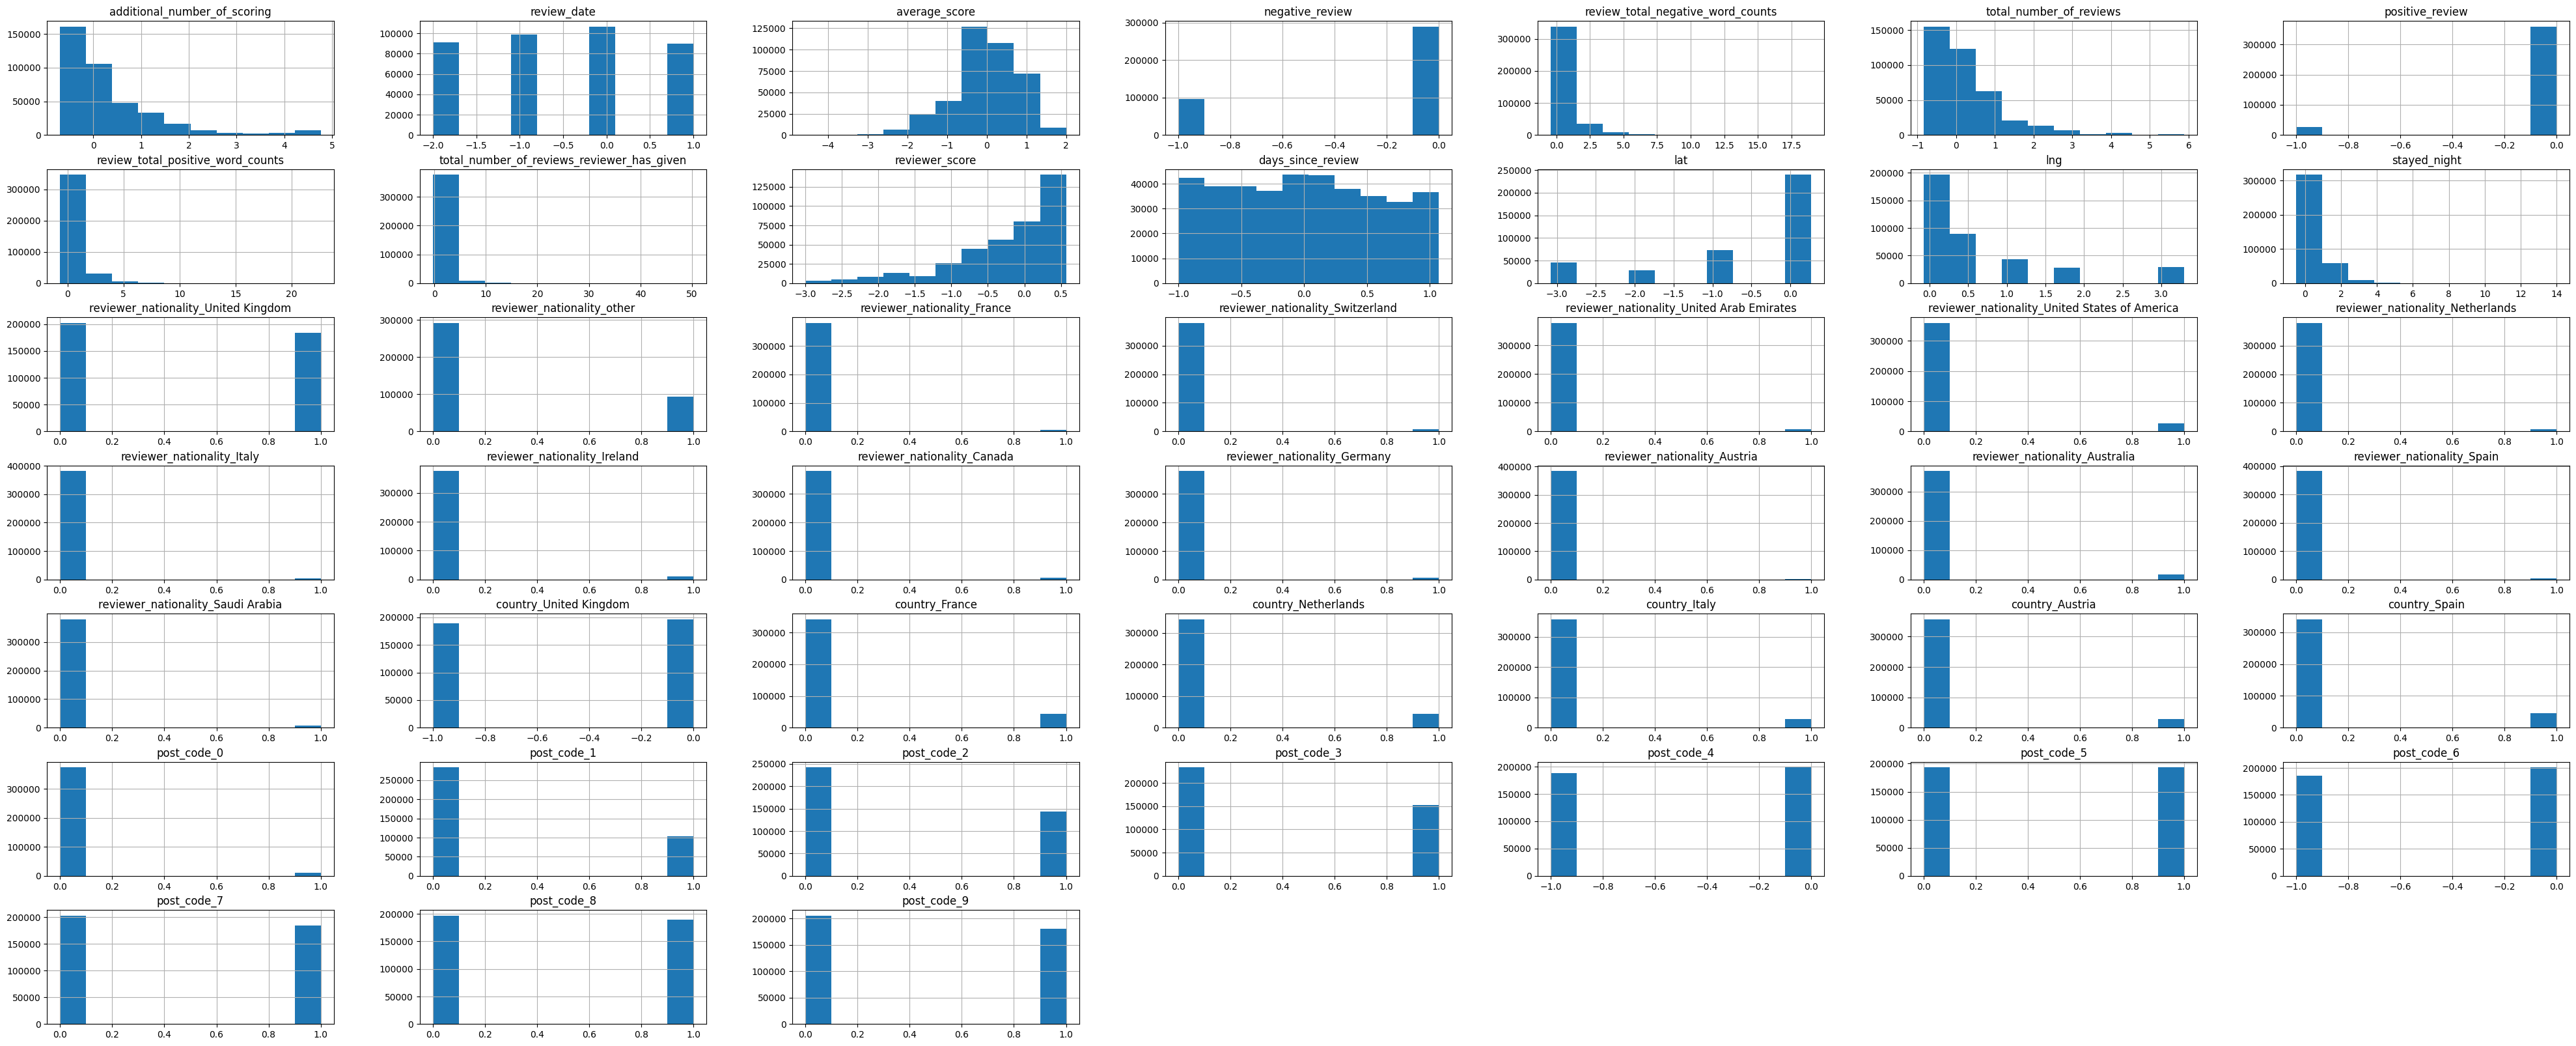

In [191]:
# Построим гистограмму для визуальной оценки признаков на нормальность после использования метода RobustScaler()
hotels_RobustScaler.hist(figsize=(50, 20));

In [189]:
# Произведем логорифмирование признаков
import numpy as np

hotels_log = np.log(hotels_test_dedupped +1)

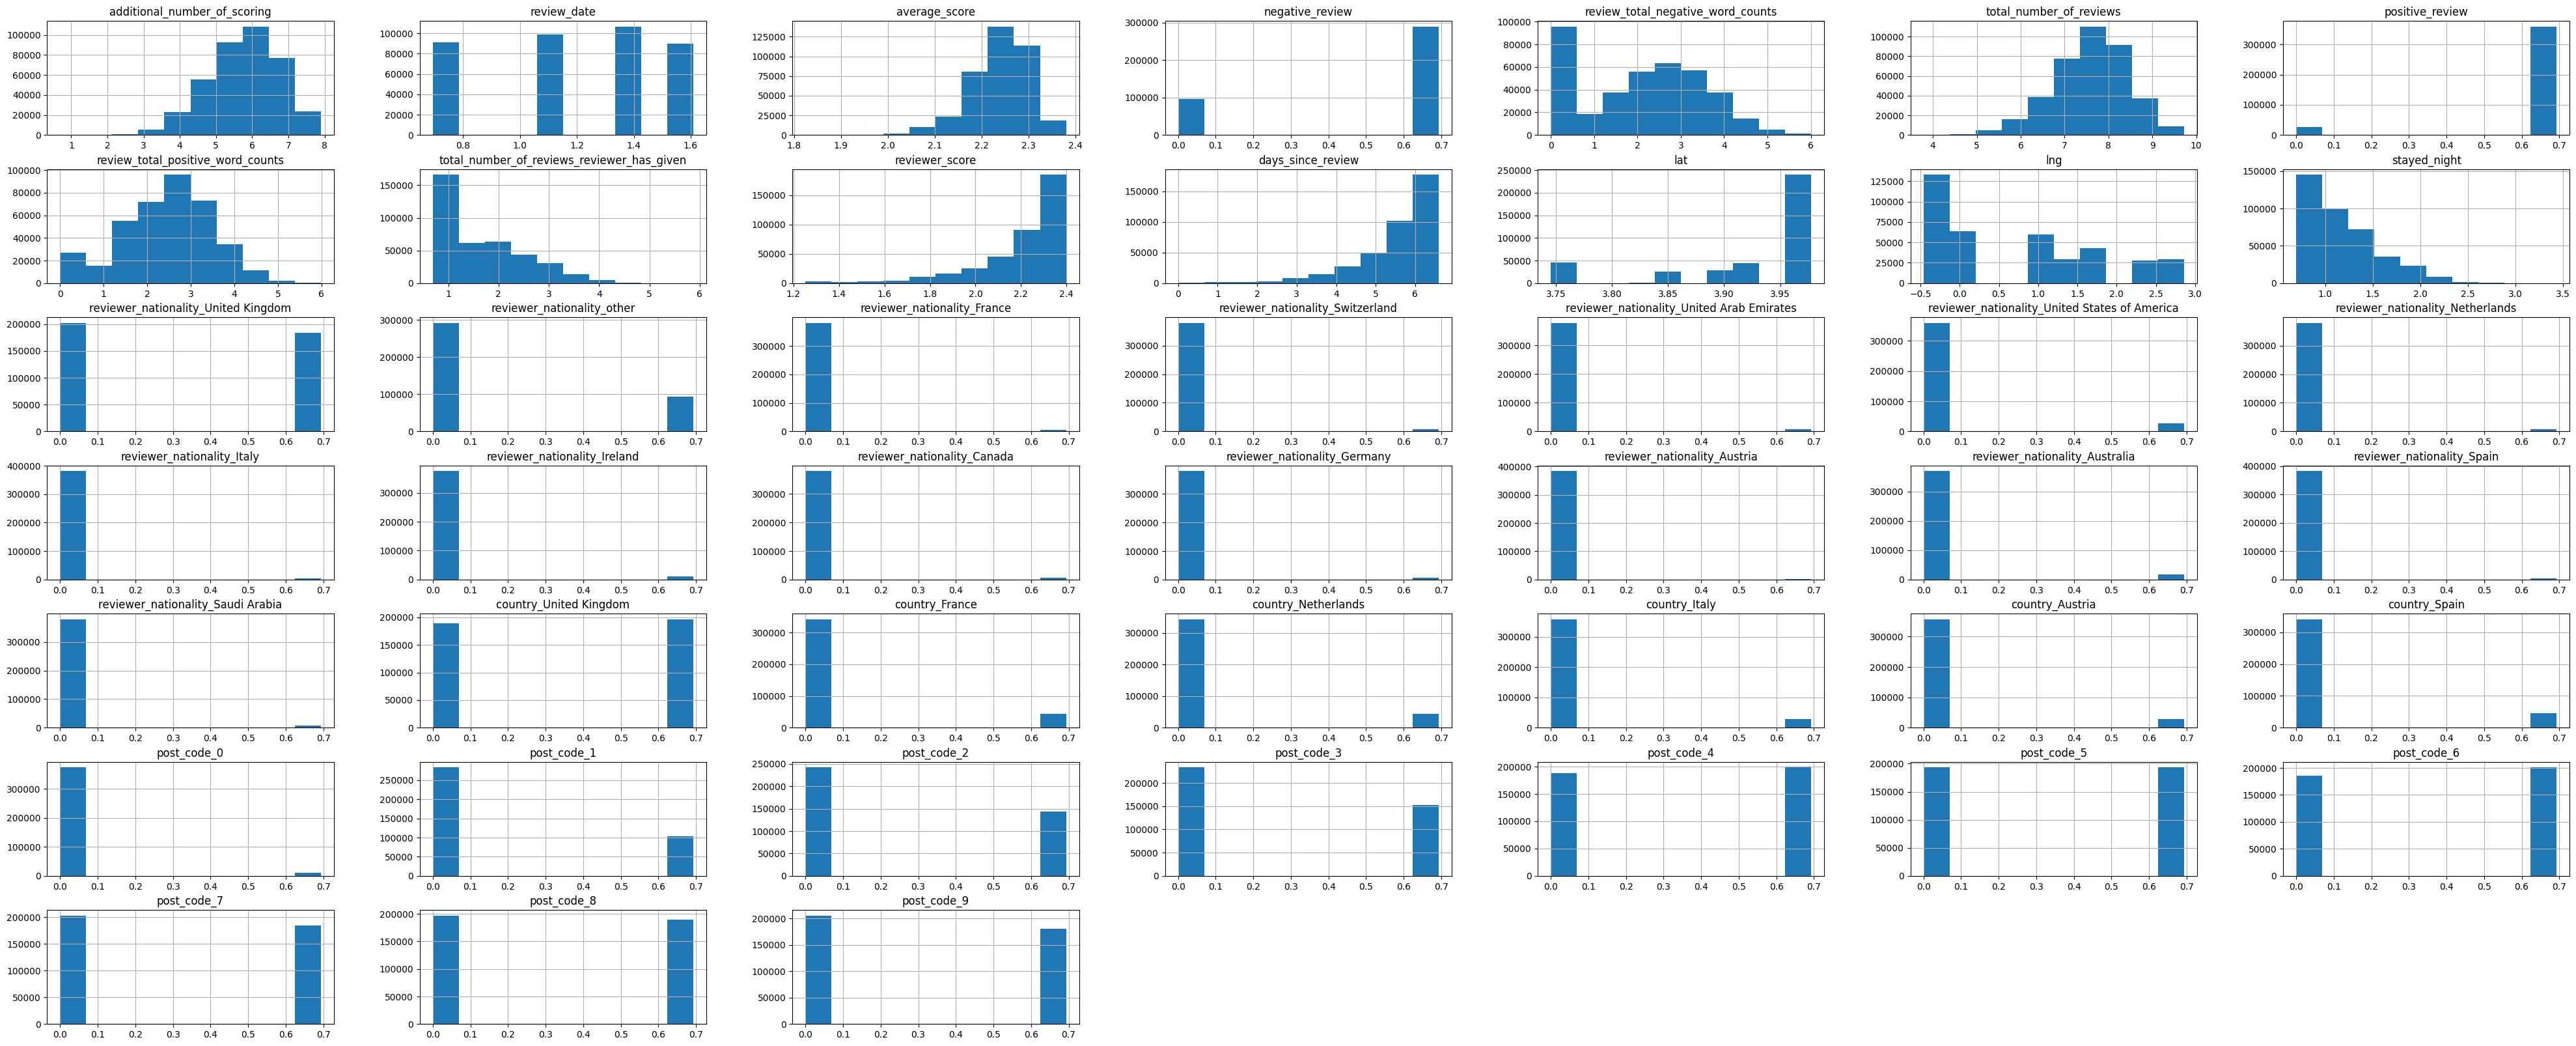

In [188]:
hotels_log.hist(figsize=(50, 20));

*Вывод: После логорифмирования столбцы additional_number_of_scoring, total_number_of_reviews и reviewer_nationality_United Kingdom стали распределяться близко к нормальному закону распределения. Оставим эти данные для дальнейшего сравнения*

*Вывод: метод RobustScaler() не изменил распределение признаков по нормальному закону распределения*

# Произведем отбор признаков

In [192]:
# непрерывные признаки
num_cols = ['additional_number_of_scoring', 'review_date', 'review_total_negative_word_counts', 'total_number_of_reviews',
            'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 'stayed_night']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'post_code_0',
       'post_code_1', 'post_code_2', 'post_code_3', 'post_code_4',
       'post_code_5', 'post_code_6', 'post_code_7', 'post_code_8',
       'post_code_9', 'reviewer_nationality_United Kingdom',
       'reviewer_nationality_other', 'reviewer_nationality_France',
       'reviewer_nationality_Switzerland',
       'reviewer_nationality_United Arab Emirates',
       'reviewer_nationality_United States of America',
       'reviewer_nationality_Netherlands', 'reviewer_nationality_Italy',
       'reviewer_nationality_Ireland', 'reviewer_nationality_Canada',
       'reviewer_nationality_Germany', 'reviewer_nationality_Austria',
       'reviewer_nationality_Australia', 'reviewer_nationality_Spain',
       'reviewer_nationality_Saudi Arabia', 'country_United Kingdom',
       'country_France', 'country_Netherlands', 'country_Italy',
       'country_Austria', 'country_Spain']

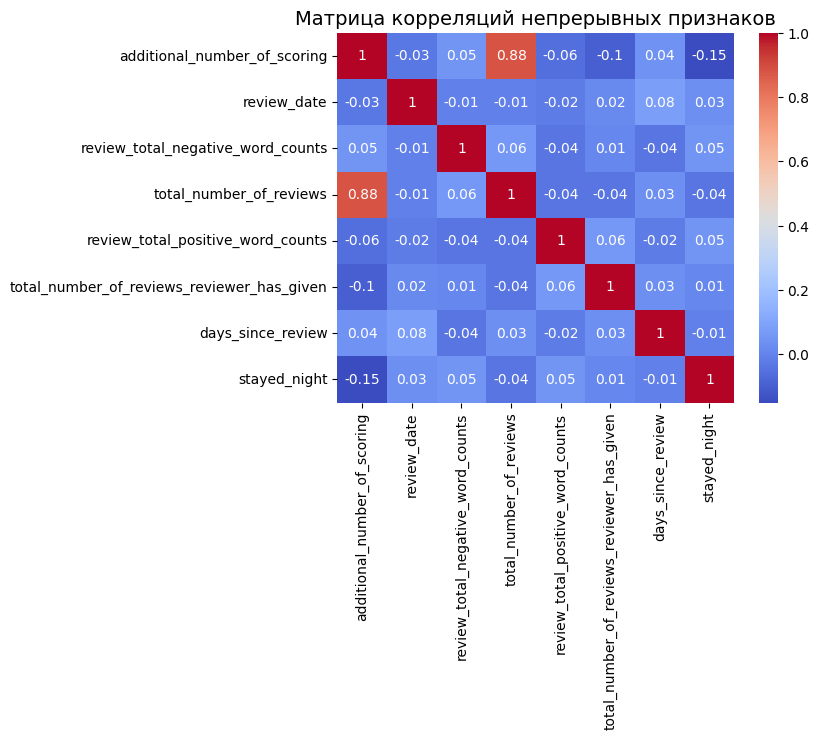

In [193]:
# Для непрерывных признаков построим матрицу корреляций методом Пирсона
heatmap = sns.heatmap(round(hotels_log[num_cols].corr(method='pearson'), 2), annot = True, cmap= 'coolwarm')
heatmap.set_title('Матрица корреляций непрерывных признаков', fontsize=14);

*Вывод: призанки additional_number_of_scoring и total_number_of_reviews имеют сильную связь(коэфициент более 0,7), соответственно один из признаков может быть удален. Удалим столбец additional_number_of_scoring*

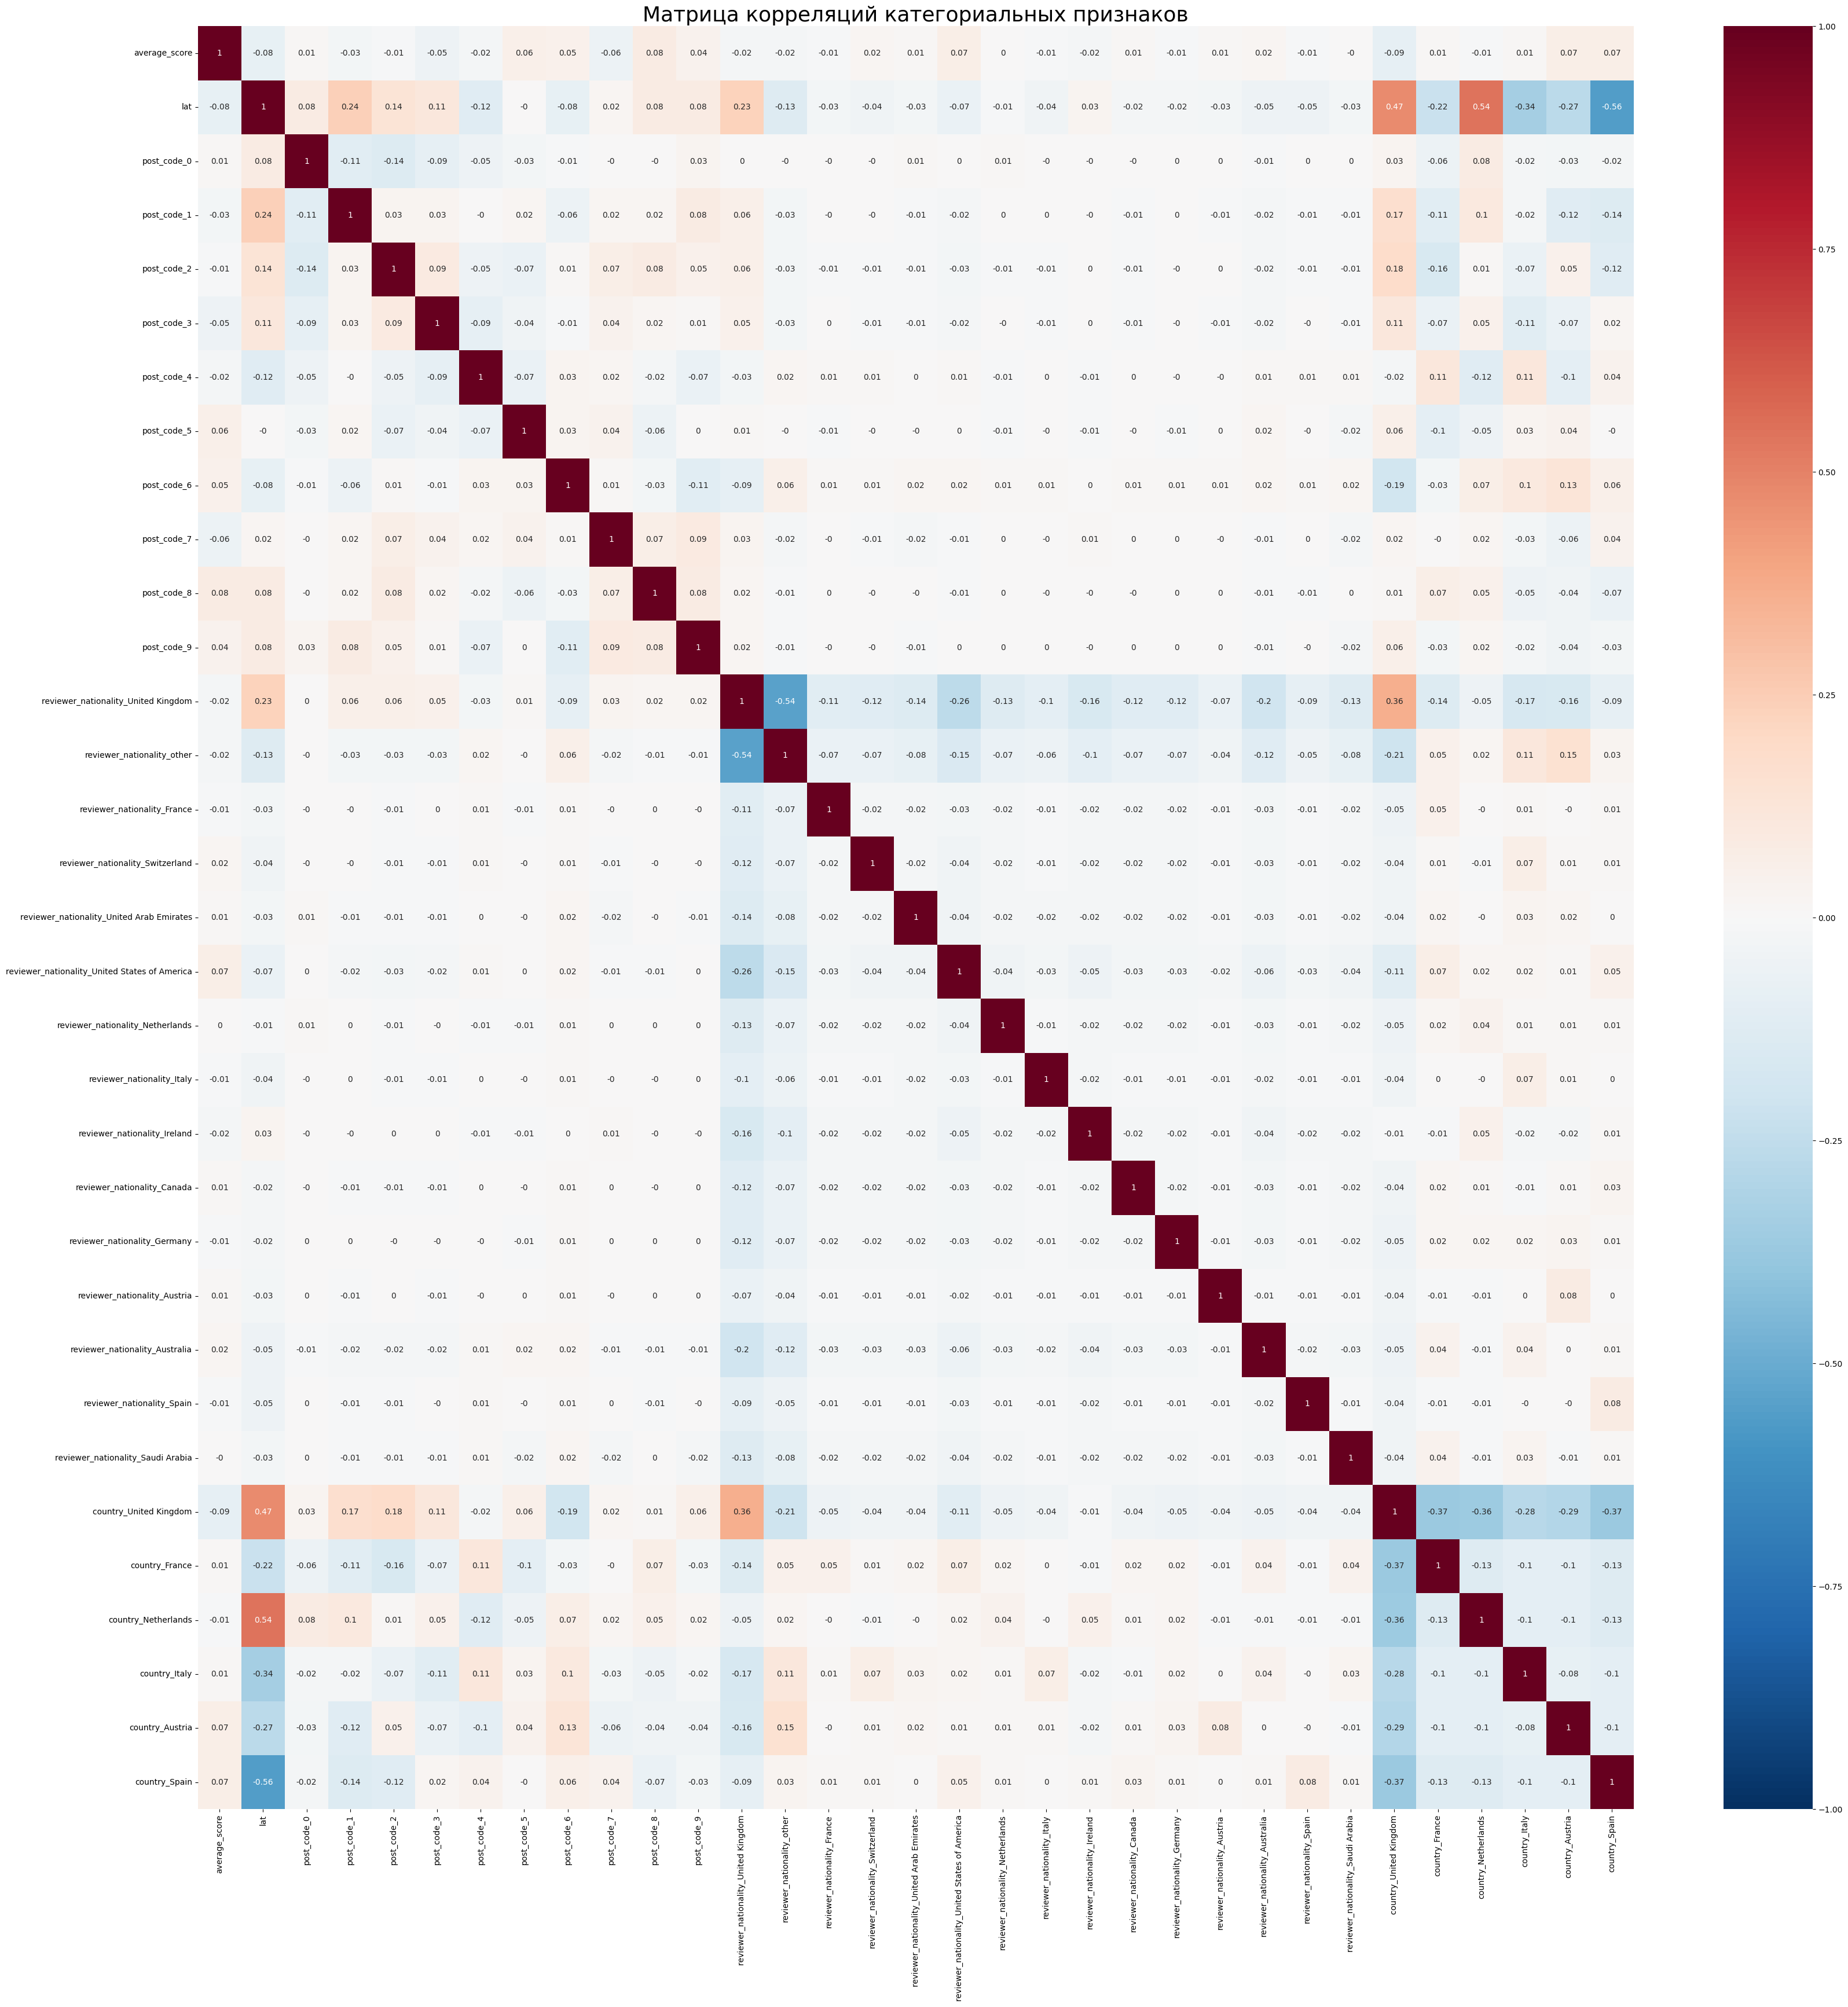

In [194]:
# Для категориальных признаков построим матрицу корреляций методом Спирмена
plt.figure(figsize=(40,40))
corr = round(hotels_log[cat_cols].corr(method='spearman'), 2)
heatmap = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)
heatmap.set_title('Матрица корреляций категориальных признаков', fontsize=26);

*Вывод: признаки ('lat', 'lng') и 'country_United Kingdom', 'country_Netherlands', 'country_Spain' имеют среднюю и сильную связь(коэфициент более 0,5 и более 0,7), соответственно данные признаки могут быть удалены. Удалим столбцы 'country_United Kingdom', 'country_Netherlands', 'country_Spain'*

<Axes: title={'center': 'График оценки значимости категориальных признаков для целевой переменной — рейтинг отеля'}>

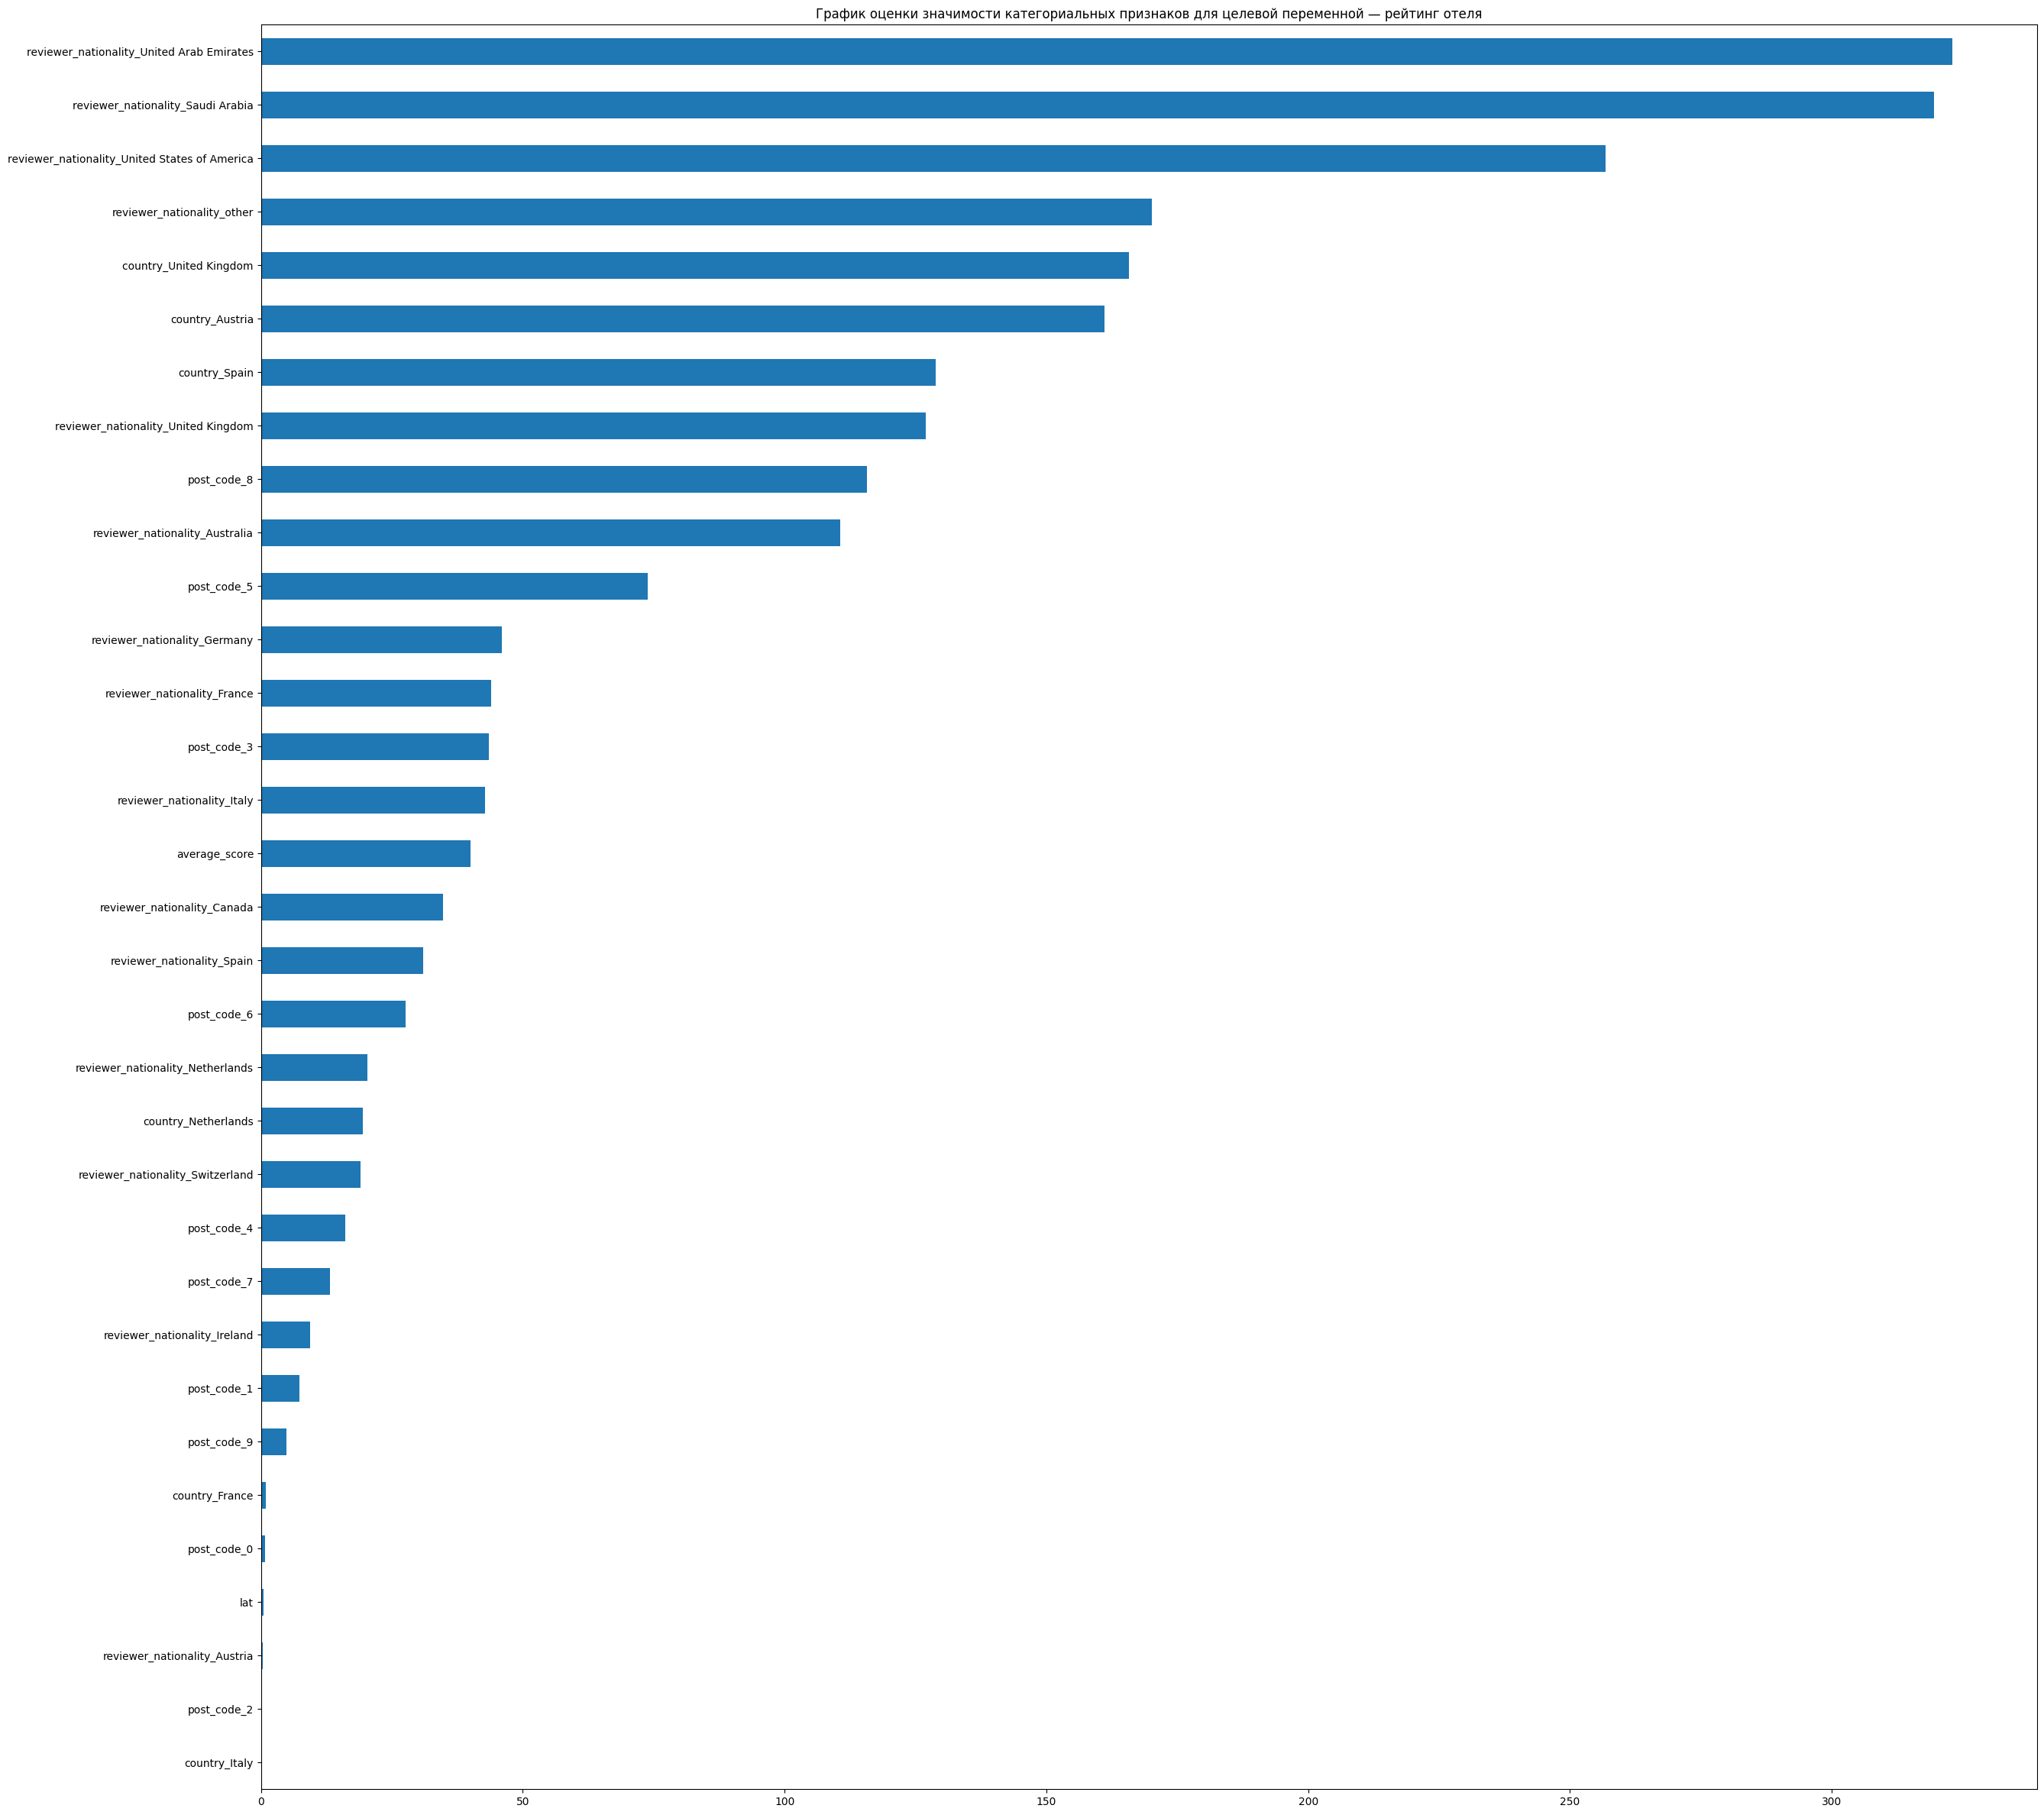

In [196]:
X = hotels_log.drop(['reviewer_score'], axis = 1)  
y = hotels_log['reviewer_score'] 

y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

plt.figure(figsize=(30,30))
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', title='График оценки значимости категориальных признаков для целевой переменной — рейтинг отеля')

*Вывод: Согласно тесту хи-квадрат, признаки 'lat', 'post_code_0', 'post_code_2', 'reviewer_nationality_Austria', 'country_France', 'country_Austria' могут быть удалены*

## Для непрерывных признаков используем тест ANOVA.

<Axes: title={'center': 'График оценки значимости непрерывных признаков для целевой переменной — рейтинг отеля'}>

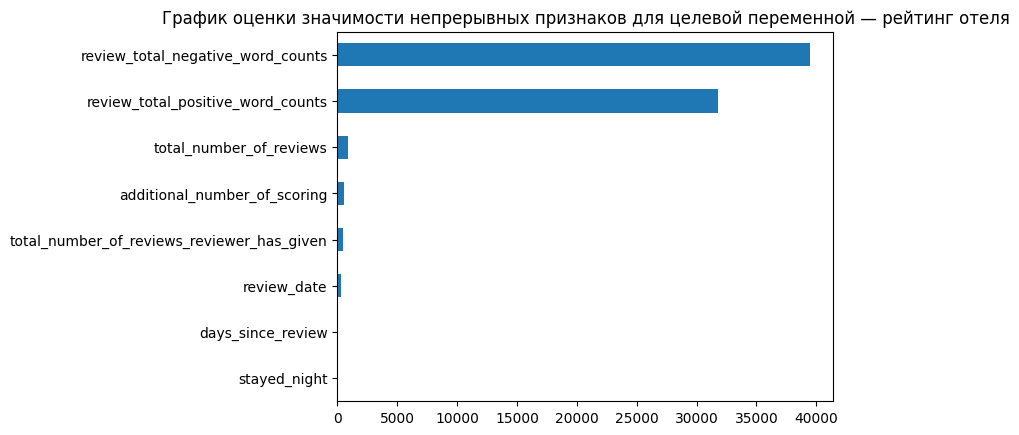

In [121]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', title='График оценки значимости непрерывных признаков для целевой переменной — рейтинг отеля')

*Вывод: Согласно тесту ANOVA, признаки 'review_date', 'days_since_review' и 'stayed_night' могут быть удалены*

In [197]:
# Удалим лишние столбцы после всех проведенных иследований
hotels_log.drop(['additional_number_of_scoring', 'country_United Kingdom', 'country_Netherlands', 'country_Spain', 'lat', 'post_code_0', 'post_code_2', 'reviewer_nationality_Austria', 'country_France', 'country_Austria', 'review_date', 'days_since_review', 'stayed_night'], axis=1, inplace=True)
#hotels_test_dedupped.drop(['additional_number_of_scoring', 'country_United Kingdom', 'country_Netherlands', 'country_Spain', 'lat', 'post_code_0', 'post_code_2', 'reviewer_nationality_Austria', 'country_France', 'country_Austria', 'review_date', 'days_since_review', 'stayed_night'], axis=1, inplace=True)

In [198]:
# Задание 4.7 Определим значение метрики MAPE, которое удалось получить на данном этапе

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels_log.drop(['reviewer_score'], axis = 1)  
y = hotels_log['reviewer_score'] 

In [163]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [164]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [165]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [166]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.05593703996731873


## Вывод

*Благодаря произведенным преобразованиям, получилось добиться улучшения с первоначальной средней абсолютной процентной ошибки с 0.13  до значения 0.0559, что говорит о значительном улучшении качества работы модели, при этом метод нормализации RobustScaler, не дает значительных изменений в показателе MAPE*